In [1]:
# Importing Libraries
from numpy import unique
from numpy import where
from matplotlib import pyplot
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import scipy.cluster.hierarchy as shc

In [3]:
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.15, 's' : 90, 'linewidths':0}

In [ ]:
# Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.
Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [4]:
Crime = pd.read_csv('crime_data.csv')
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
Crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
print(f"Missing values in each variable: \n{Crime.isnull().sum()}")

Missing values in each variable: 
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


In [7]:
print(f"Duplicated rows: {Crime.duplicated().sum()}")

Duplicated rows: 0


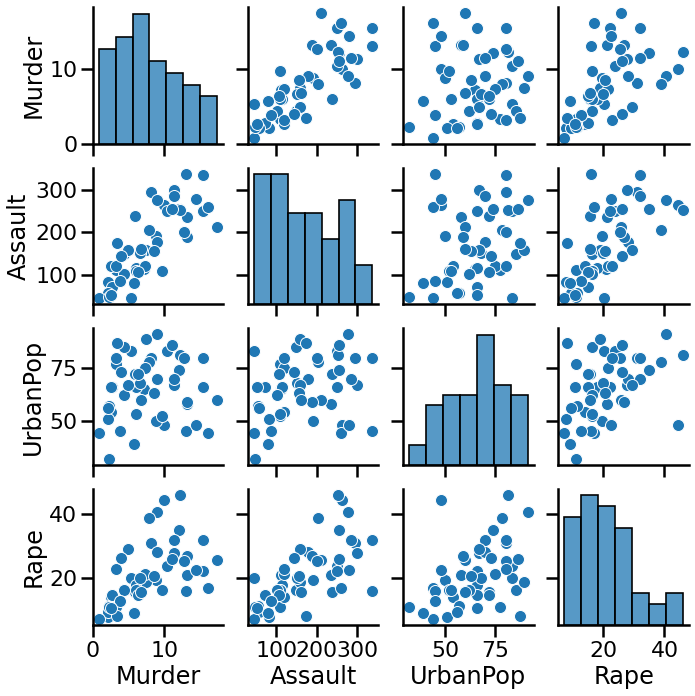

In [8]:
sns.pairplot(Crime.iloc[:,0:5])

In [9]:
# MODEL 1 - KMeans
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [10]:
df_norm = norm_func(Crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [11]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)

Inertia :  1.3737096444414774
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0xc500820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

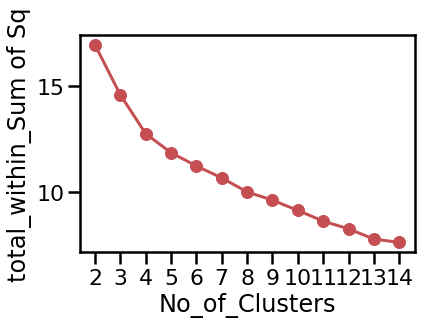

In [12]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [13]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=5) 
model1.fit(df_norm)

KMeans(n_clusters=5)

In [14]:
model1.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model1.labels_)  # converting numpy array into pandas series object 
Crime['clust']=md 
# creating a  new column and assigning it to new column 
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


## KMeans Clustering Model - Graph


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


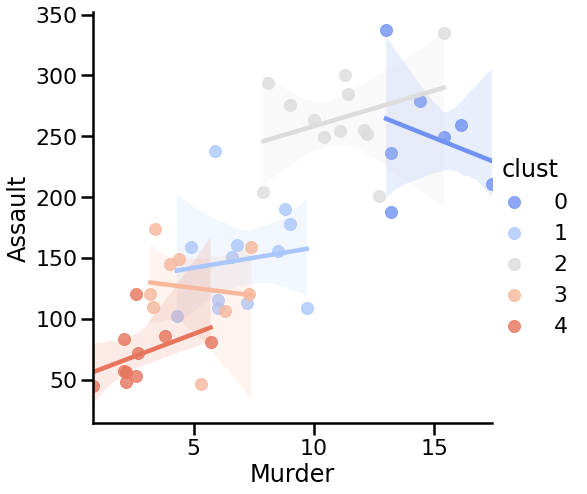

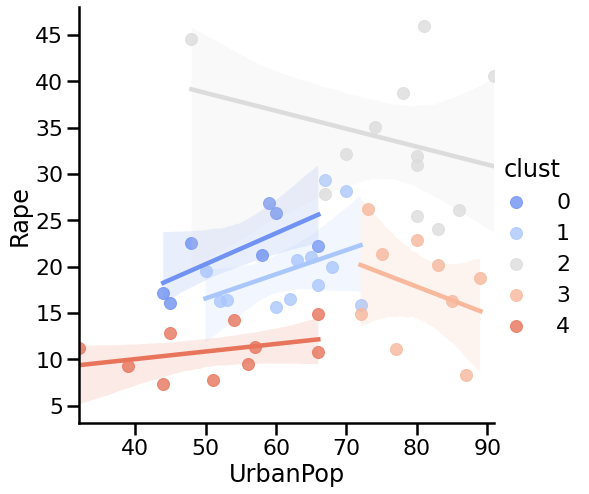

In [15]:
print("## KMeans Clustering Model - Graph")
sns.lmplot('Murder', 'Assault', data=Crime, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('UrbanPop', 'Rape', data=Crime, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
plt.show()

In [16]:
# MODEL 2 - HIERARCHIAL CLUSTERIN
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(Crime.iloc[:,1:])

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

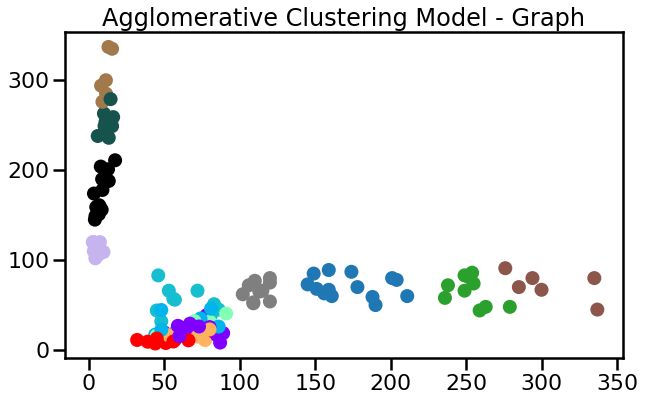

In [17]:
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model2.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model2.labels_, cmap='cubehelix')
plt.show()

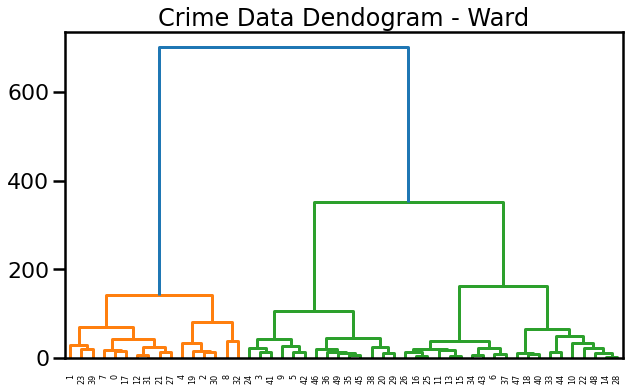

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='ward'))

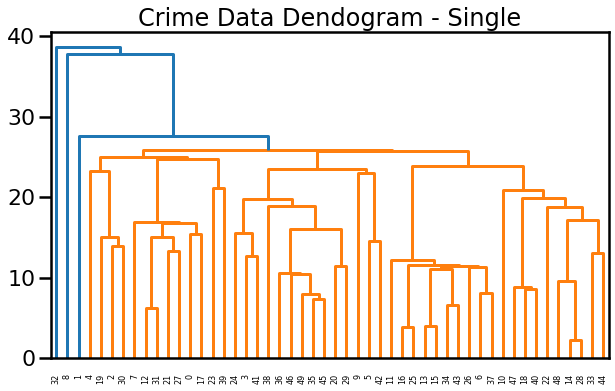

In [19]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='single'))

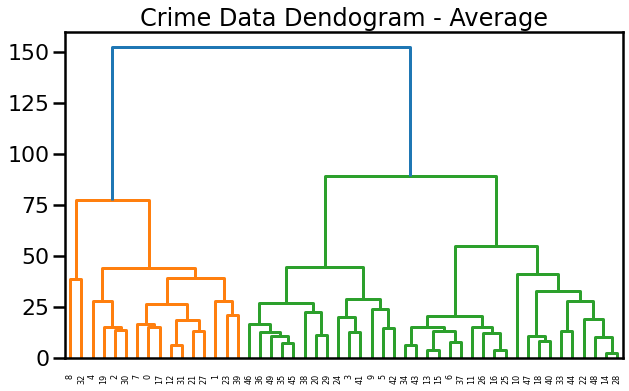

In [20]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Average")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='average'))

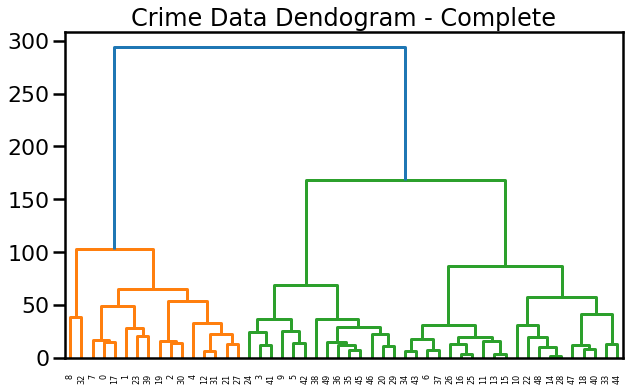

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='complete'))

In [22]:
# MODEL 3 - Birch Clustering
model3 = Birch(threshold=0.01, n_clusters=10)
model3.fit(Crime.iloc[:,1:4])
model3.predict(Crime.iloc[:,1:4])
print(model3.labels_)

[3 7 6 2 6 2 1 3 4 2 5 1 3 1 5 1 1 3 8 6 0 3 5 7 0 1 1 3 5 0 6 3 4 9 1 0 0
 1 0 7 8 2 2 1 9 0 0 8 5 0]


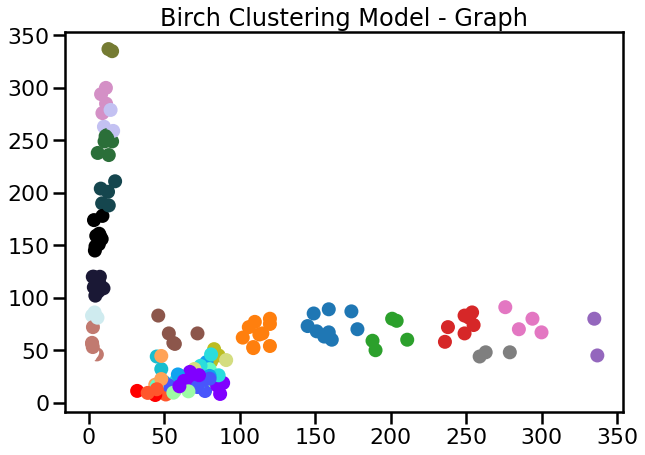

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Birch Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model3.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model3.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model3.labels_, cmap='cubehelix')
plt.show()

In [24]:
# MODEL 4 - DBSCAN Clustering
model4 = DBSCAN(eps=0.30, min_samples=9)
model4.fit_predict(Crime.iloc[:,1:4])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

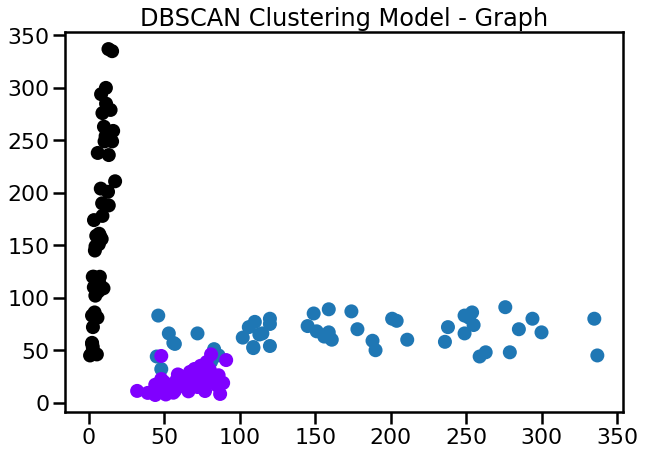

In [25]:
plt.figure(figsize=(10, 7))
plt.title("DBSCAN Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model4.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model4.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model4.labels_, cmap='cubehelix')
plt.show()

In [26]:
# MODEL 5 - MeanShift Clustering
model5 = MeanShift()
model5.fit_predict(Crime.iloc[:,1:4])

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 2], dtype=int64)

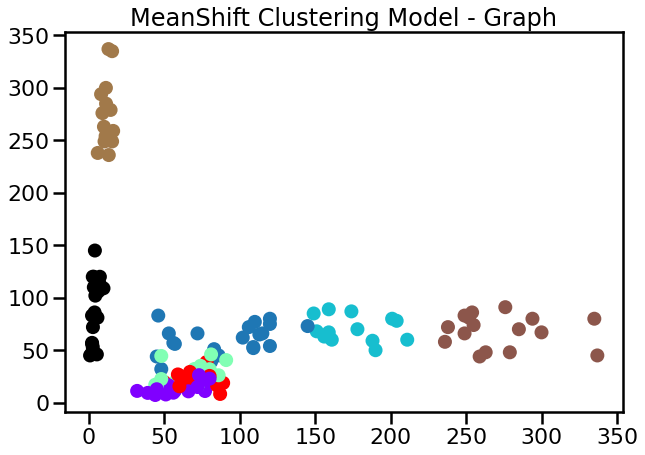

In [27]:
plt.figure(figsize=(10, 7))
plt.title("MeanShift Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model5.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model5.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model5.labels_, cmap='cubehelix')
plt.show()

In [28]:
# MODEL 6 - OPTICS Clustering
model6 = OPTICS(eps=0.8, min_samples=10)
model6.fit_predict(Crime.iloc[:,1:4])

array([ 0,  0,  0, -1,  0,  0,  1,  0, -1,  0, -1,  1,  0,  1, -1,  1,  1,
        0,  1,  0, -1,  0, -1,  0, -1,  1,  1,  0, -1, -1,  0,  0, -1, -1,
        1, -1, -1,  1, -1,  0,  1, -1,  0,  1, -1, -1, -1, -1, -1, -1])

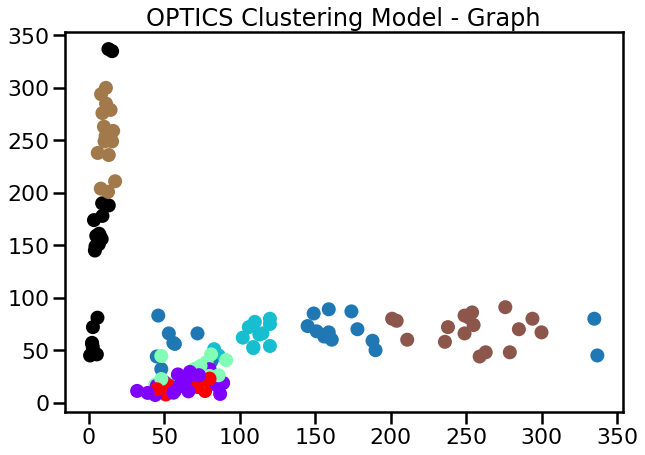

In [29]:
plt.figure(figsize=(10,7))
plt.title("OPTICS Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model6.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model6.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model6.labels_, cmap='cubehelix')
plt.show()

In [30]:
# MODEL 7 - Spectral Clustering
model7 = SpectralClustering(n_clusters=2)
model7.fit_predict(Crime.iloc[:,1:4])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

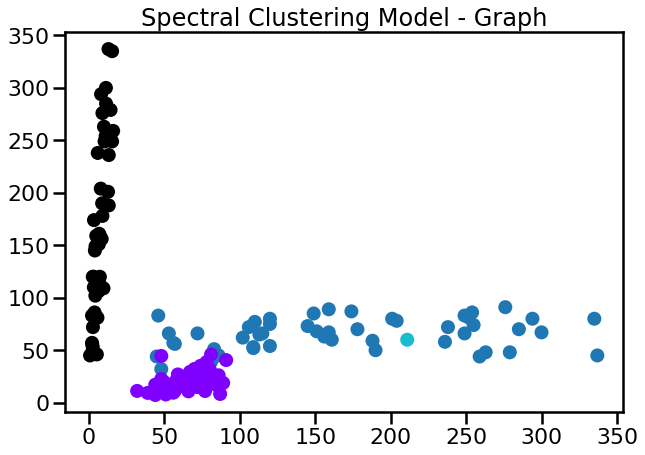

In [31]:
plt.figure(figsize=(10,7))
plt.title("Spectral Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model7.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model7.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model7.labels_, cmap='cubehelix')
plt.show()

In [ ]:
Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
Data Description:
 The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers
ID --Unique ID
Balance--Number of miles eligible for award travel
Qual_mile--Number of miles counted as qualifying for Topflight status
cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000
Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
Bonus_trans--Number of non-flight bonus transactions in the past 12 months
Flight_miles_12mo--Number of flight miles in the past 12 months
Flight_trans_12--Number of flight transactions in the past 12 months
Days_since_enrolled--Number of days since enrolled in flier program
Award--whether that person had award flight (free flight) or not

In [37]:
XLSX = pd.ExcelFile('EastWestAirlines.xlsx')
XLSX.sheet_names

['data']

In [38]:
Airlines = pd.read_excel('EastWestAirlines.xlsx')

In [39]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [40]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [41]:
print(f"Missing values in each variable: \n\n{Airlines.isnull().sum()}")

Missing values in each variable: 

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [42]:
print(f"Duplicated rows: {Airlines.duplicated().sum()}")

Duplicated rows: 0


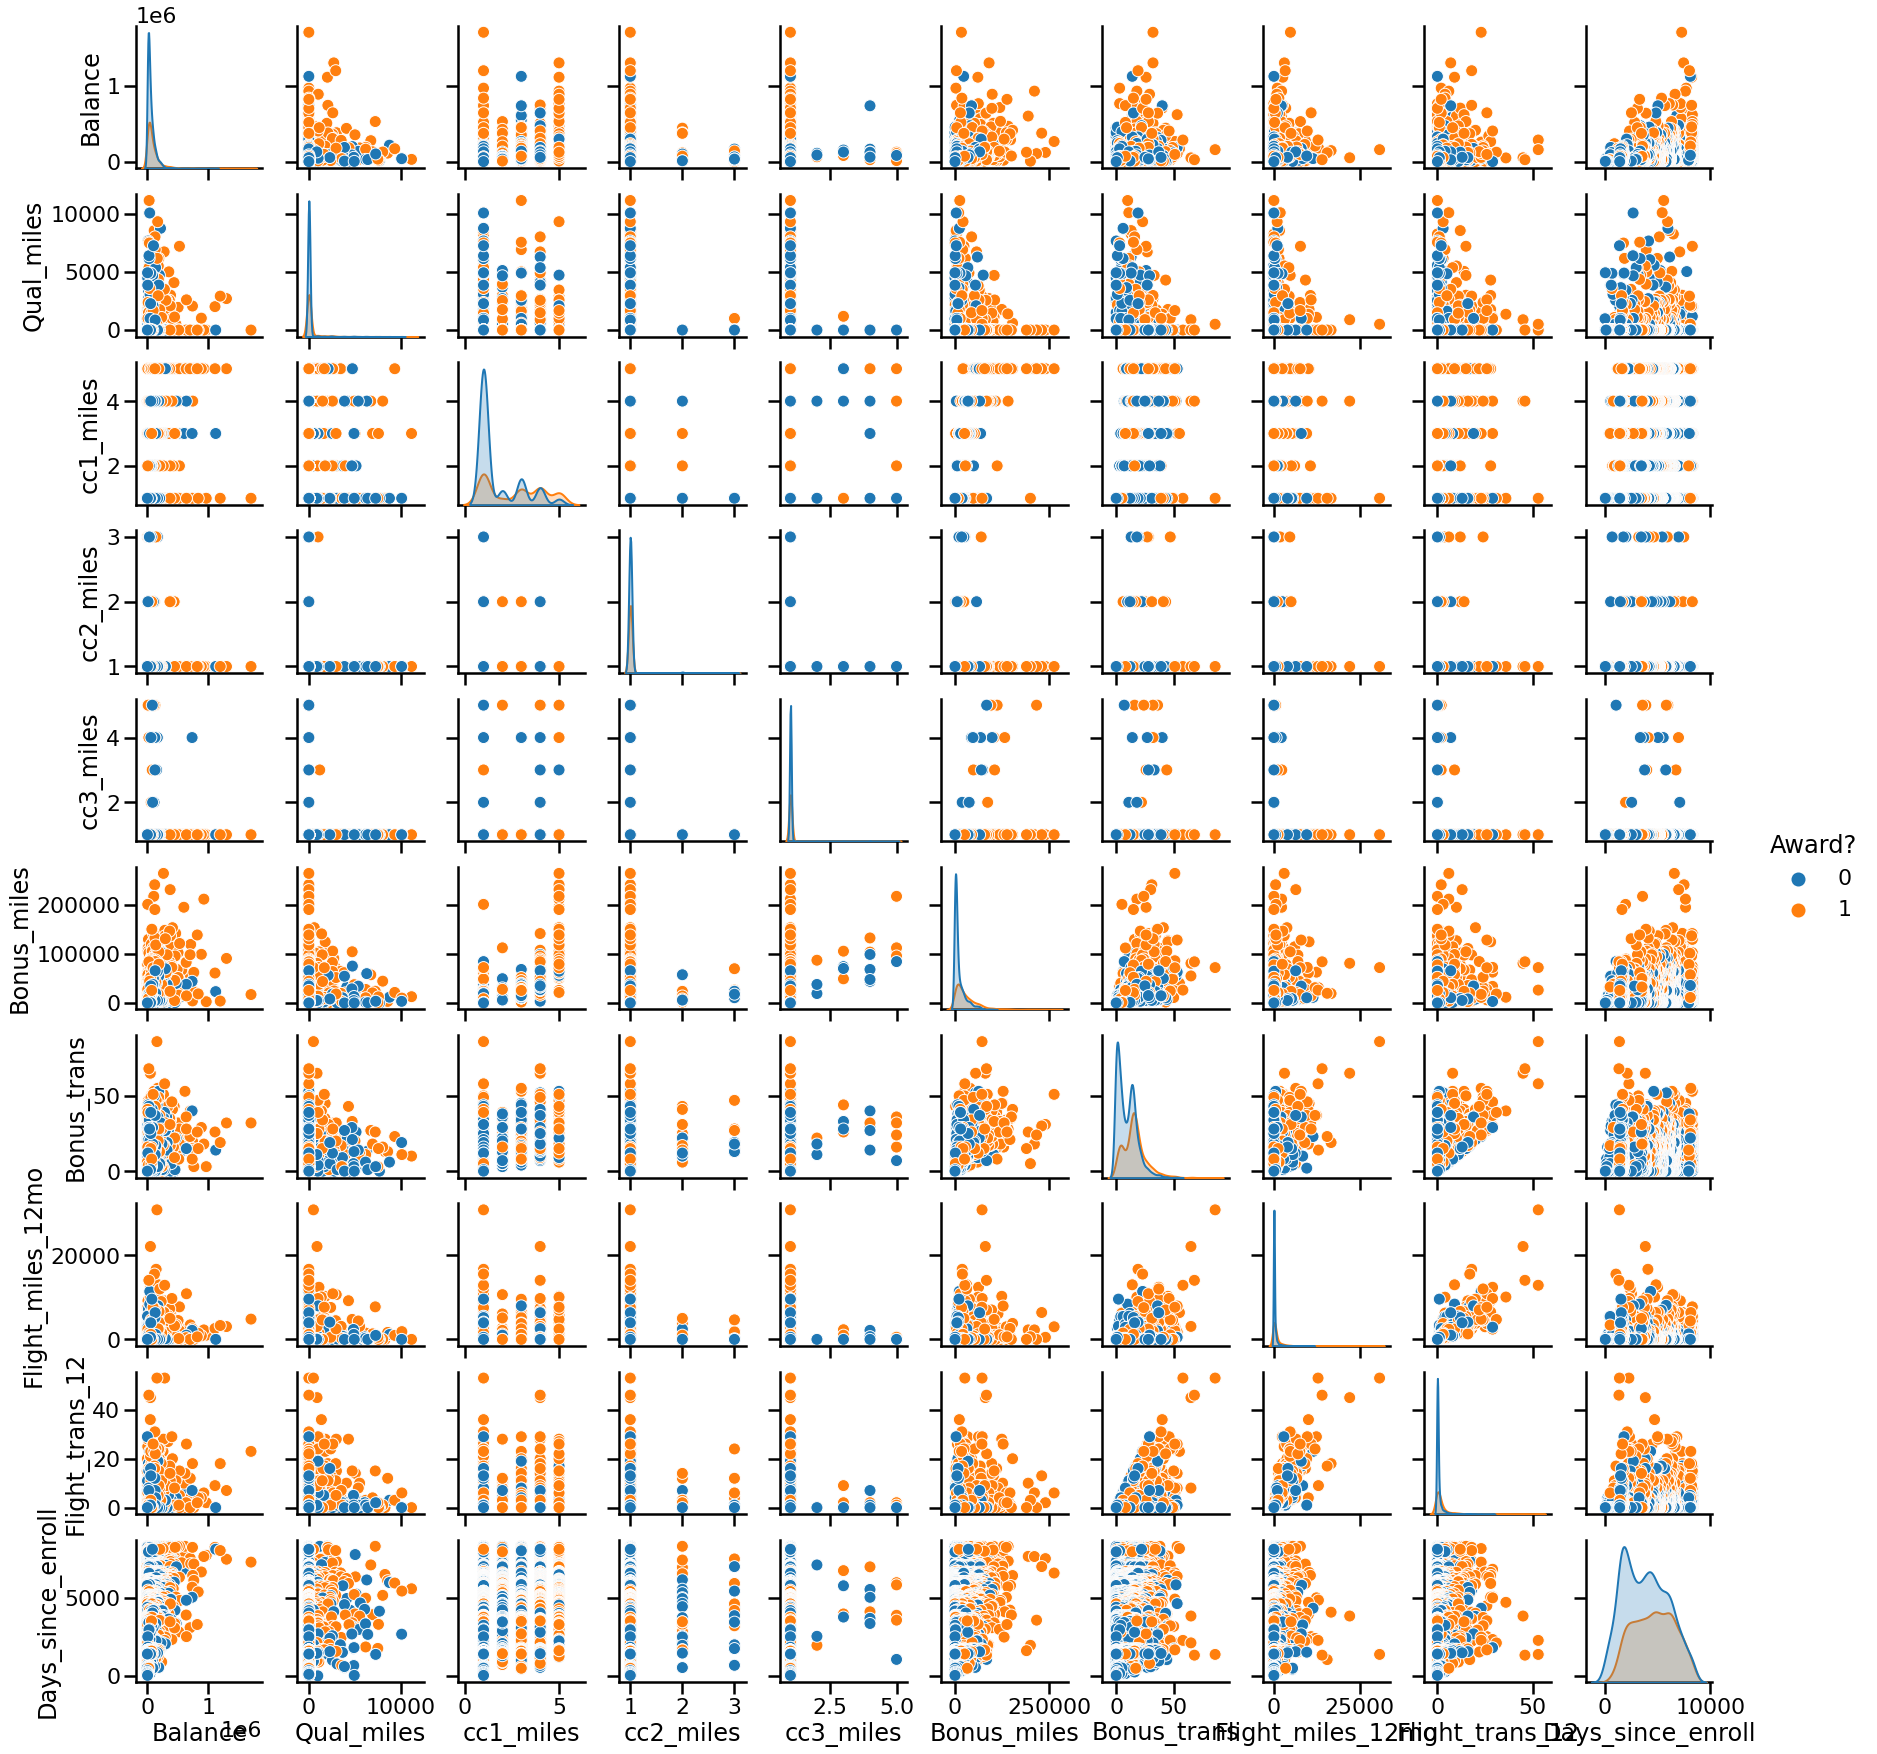

In [43]:
sns.pairplot(Airlines.iloc[:,1:12],hue='Award?')

In [44]:
df_norm_Air = norm_func(Airlines.iloc[:,:])
df_norm_Air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [45]:
# MODEL 1 - KMeans Clustering
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm_Air)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm_Air.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm_Air.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)

Inertia :  242.85704624219608
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0x13397dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

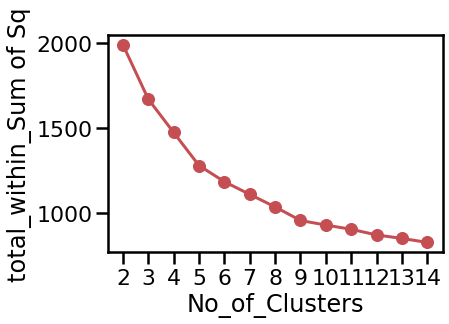

In [46]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [47]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=10) 
model1.fit(df_norm_Air)

KMeans(n_clusters=10)

In [48]:
model1.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model1.labels_)  # converting numpy array into pandas series object 
Airlines['clust']=md 
# creating a  new column and assigning it to new column 
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,8
1,2,19244,0,1,1,1,215,2,0,0,6968,0,8
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,8
3,4,14776,0,1,1,1,500,1,0,0,6952,0,8
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,7


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anacond

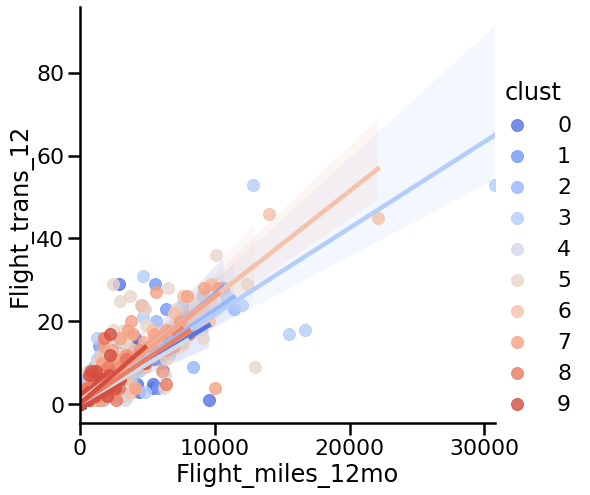

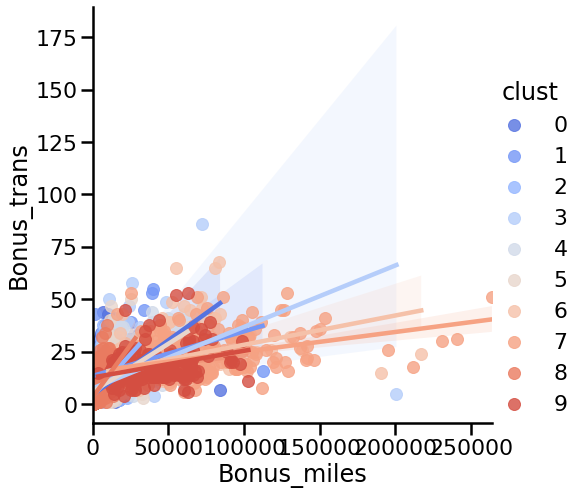

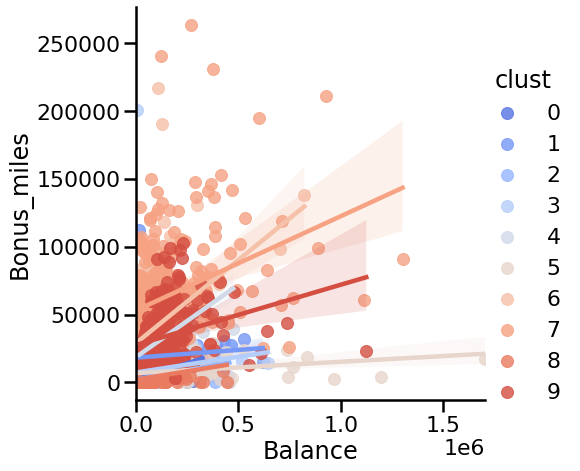

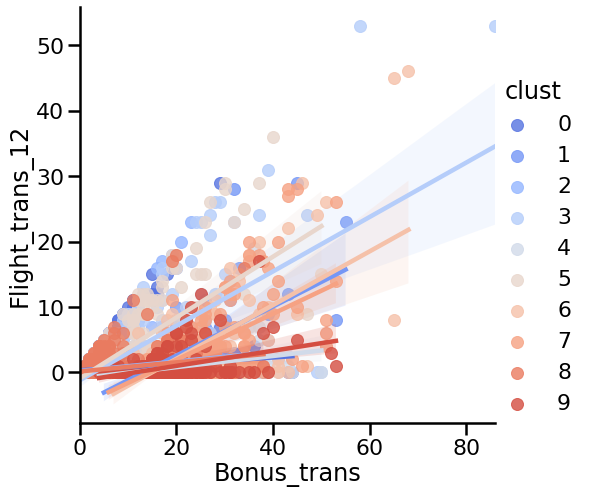

In [49]:
sns.lmplot('Flight_miles_12mo', 'Flight_trans_12', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('Bonus_miles', 'Bonus_trans', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('Balance', 'Bonus_miles', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('Bonus_trans', 'Flight_trans_12', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
plt.show()

In [50]:
# MODEL 2 - Hierarchial Clustering
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(Airlines.iloc[:,0:14])

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

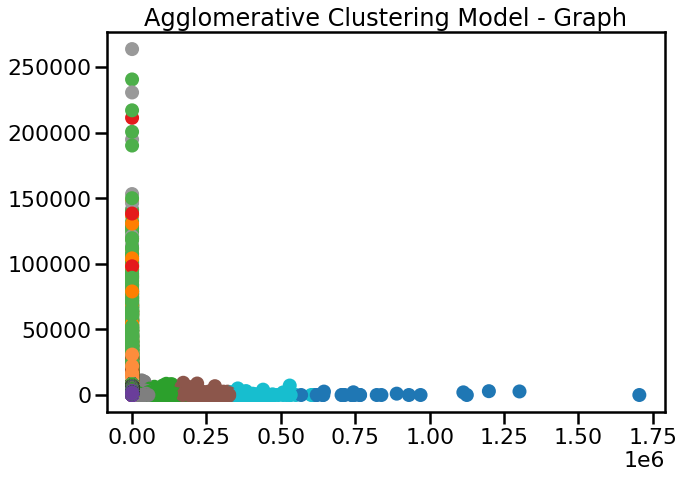

In [51]:
plt.figure(figsize=(10,7))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model2.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model2.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model2.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model2.labels_, cmap='Paired')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Airlines Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(Airlines.iloc[:,:13], method='ward'))

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Airlines Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(Airlines.iloc[:,:13], method='complete'))

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Airlines Data Dendogram - Average")
dend = shc.dendrogram(shc.linkage(Airlinesiloc.[:,:13], method='average'))

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Airlines Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(Airlines.iloc[:,:13], method='single'))

In [ ]:
#MODEL 3 - Birch Clustering
model3 = Birch(threshold=0.01, n_clusters=10)
model3.fit(Airlines.iloc[:,:13])
model3.predict(Airlines.iloc[:,:13])

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Birch Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model3.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model3.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model3.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model3.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model3.labels_, cmap='Paired')
plt.scatter(Airlines.iloc[:,11], Airlines.iloc[:,12], c=model3.labels_, cmap='tab20')
plt.show()

In [ ]:
# MODEL 4 - DBSCAN clustering
model4 = DBSCAN(eps=0.30, min_samples=9)
model4.fit_predict(Airlines.iloc[:,:13])

In [ ]:
plt.figure(figsize=(10,7))
plt.title("DBSCAN Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model4.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model4.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model4.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model4.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model4.labels_, cmap='Paired')
plt.scatter(Airlines.iloc[:,11], Airlines.iloc[:,12], c=model4.labels_, cmap='tab20')
plt.show()

In [ ]:
# MODEL 5 - MeanShift Clustering
model5 = MeanShift()
model5.fit_predict(Airlines.iloc[:,:14])

In [ ]:
plt.figure(figsize=(10,7))
plt.title("MeanShift Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model5.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model5.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model5.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model5.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model5.labels_, cmap='Paired')
plt.scatter(Airlines.iloc[:,11], Airlines.iloc[:,12], c=model5.labels_, cmap='tab20')
plt.show()

In [ ]:
# MODEL 6 - OPTICS Clustering
model6 = OPTICS(eps=0.5, min_samples=10)
model6.fit_predict(Airlines.iloc[:,:14])

In [ ]:
plt.figure(figsize=(10,7))
plt.title("OPTICS Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model6.labels_, cmap='tab10',marker='*')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model6.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model6.labels_, cmap='Set1',marker='^')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model6.labels_, cmap='tab20c',marker = '+')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model6.labels_, cmap='Paired')
plt.scatter(Airlines.iloc[:,11], Airlines.iloc[:,12], c=model6.labels_, cmap='tab20')
plt.show()

In [ ]:
# MODEL 7 - Spectral Clustering
model7 = SpectralClustering(n_clusters=4)
model7.fit_predict(Airlines.iloc[:,:14])

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Spectral Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model7.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model7.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model7.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model7.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model7.labels_, cmap='Paired')
plt.scatter(Airlines.iloc[:,11], Airlines.iloc[:,12], c=model7.labels_, cmap='tab20')
plt.show()